# **PART I. DATA LOADING, PREPROCESSING AND FEATURE SCALING**

# **1. Data Preprocessing**

# **1.1. Data Loading**

In [ ]:
#Data Loading
import pandas as pd
import numpy as np
df = pd.read_csv('Wholesale customers data - A.csv')

# **1.2. Data Exploration**

**Display the First and Last 5 Rows of the Dataset**

In [ ]:
#Display the first 5 rows of the dataset
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper
0,2,3,12669,9656,7561,214,2674
1,2,3,7057,9810,9568,1762,3293
2,2,3,6353,8808,7684,2405,3516
3,1,3,13265,1196,4221,6404,507
4,2,3,22615,5410,7198,3915,1777


In [ ]:
#Display the last 5 rows of the dataset
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper
435,1,3,29703,12051,16027,13135,182
436,1,3,39228,1431,764,4510,93
437,2,3,14531,15488,30243,437,14841
438,1,3,10290,1981,2232,1038,168
439,1,3,2787,1698,2510,65,477


**Data Dimension**

In [ ]:
#Data Dimension
print(f'Number of rows and columns: {df.shape[0]} rows and {df.shape[1]} columns')

Number of rows and columns: 440 rows and 7 columns


As a result, we discover that this dataset has 7 columns and 440 rows. For comparing unsupervised and supervised algorithms, this sample size should be enough to provide valuable visualizations and insights.

**Data Structure**

In [ ]:
#Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


**Descriptive Statistics**

In [ ]:
#Descriptive Statistics
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000


**Histogram Visualization for All Columms**

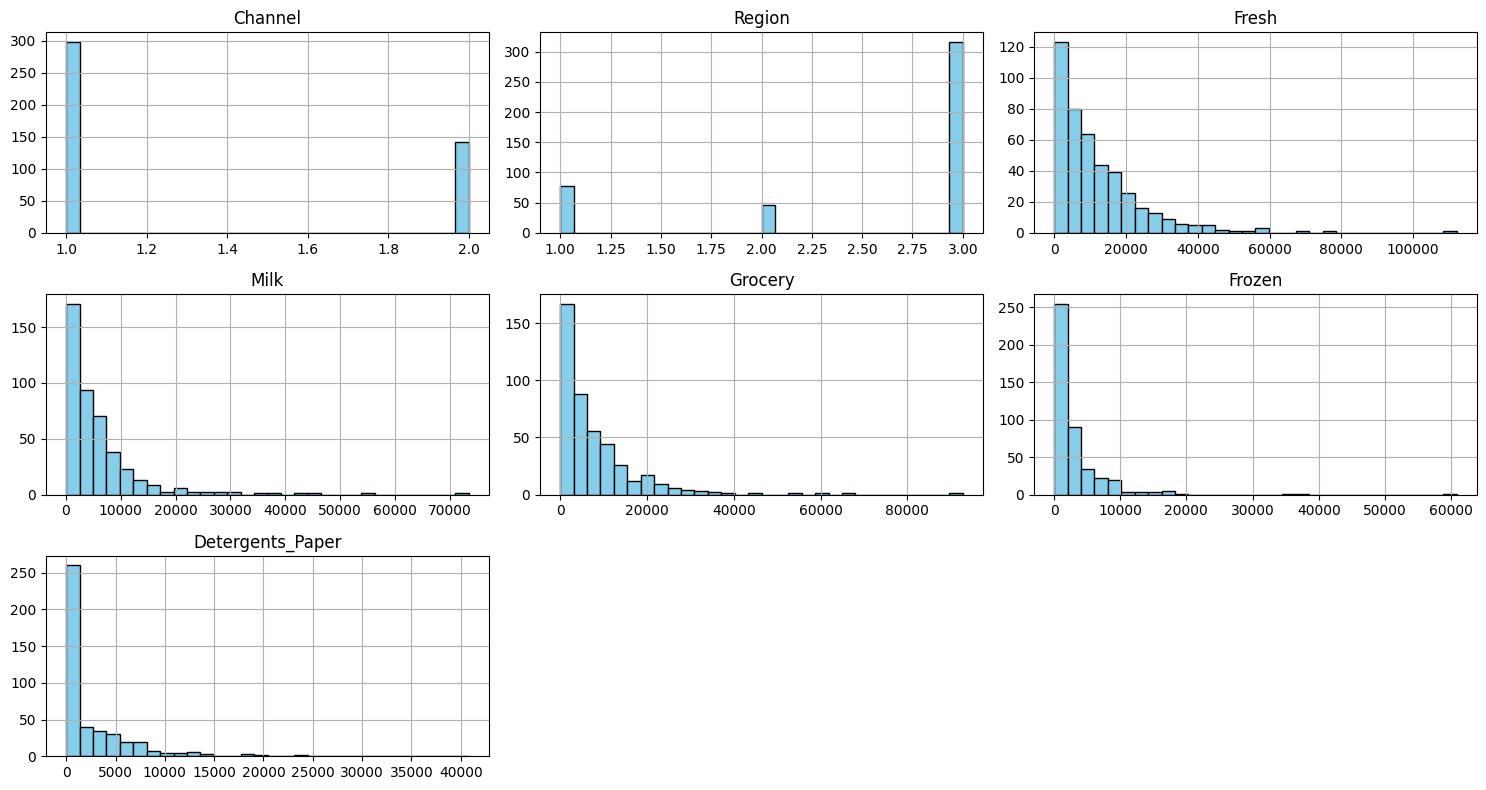

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create histograms for all columns
df.hist(figsize=(15, 8), bins=30, color='skyblue', edgecolor='black')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Some significant observations from the result:

• Channel: The 'Channel' column has 2 values, 1 and 2, with most customers belonging to Channel 1.

• Region: The 'Region' column contains values from 1 to 3, with a mean of 2.54,
and are used as class labels in this project.

• Fresh, Milk, Grocery, Frozen and Detergents_Paper: These columns show the annual spending (in monetary units) for various product categories. All of these columns are right-skewed, which means that the majority of customers pay less, while a small percentage spend much more. According to this statistics, Fresh and Grocery are the most popular categories, with the largest average spending (12,000 for Fresh; 7,951 for Grocery), while Detergents_Paper is less popular, with a mean spending of 2,881.

# **1.3. Checking Data Quality: Duplicates, Missing Values, and Outliers**

**Checking for Duplicated Values**

In [ ]:
#Check any duplicated values
num_duplicates = df.duplicated().sum()
print(f'Number of duplicated values: {num_duplicates}')

Number of duplicated values: 0


**Checking for Missing Values**

In [ ]:
#Display missing value in dataset
missing_values = df.isna().sum()
print(f'Number of missing values in each columns: {missing_values}')

Number of missing values in each columns: Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
dtype: int64


As the result, there is no missing and duplicated values on the dataset.

**Check Outliers in Dataset**

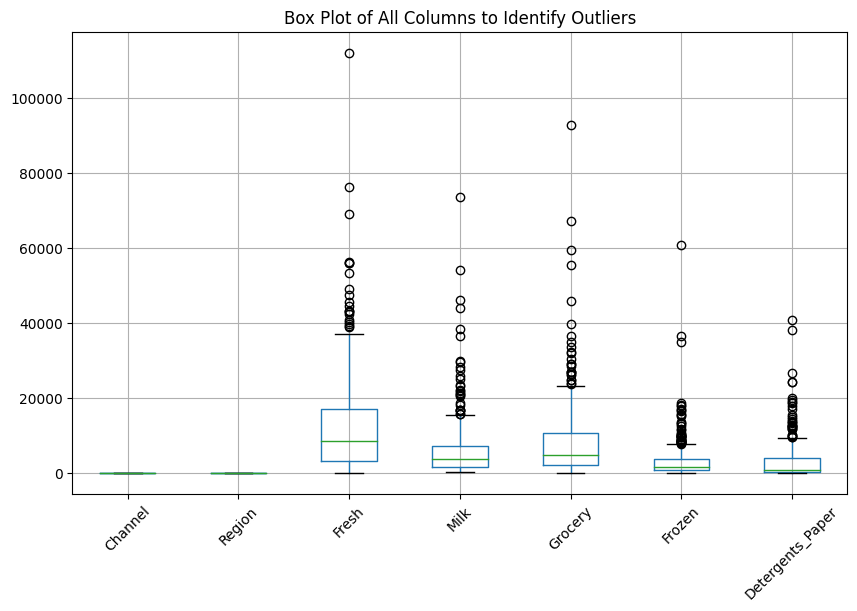

In [ ]:
#Check outliers in the dataset
#Select the columns to plot
columns_to_plot = df.columns

# Create the box plot
plt.figure(figsize=(10, 6))
df[columns_to_plot].boxplot()
plt.title('Box Plot of All Columns to Identify Outliers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Outliers may bias outcomes and affect the accuracy of clustering models, thus it is necessary to eliminate them before using K-Means and Hierarchical Clustering:

• With K-Means clustering, outliers may change centroids,
resulting in incorrect cluster formations. This can lead to
inaccurate cluster forms and poor clustering
performance.

• With Hierarchical clustering, outliers may change the
structure of the dendrogram, resulting in misleading
cluster merging. Removing them leads to more accurate
cluster associations.

**Remove Outliers in the Dataset**

I will create a function that removes the most significant outliers. In addition, I will alter the bounds for outliers
(lower_bound and upper_bound), widening both the lower and higher limits to guarantee that the most extreme outliers
are excluded.

Number of outliers removed: 16


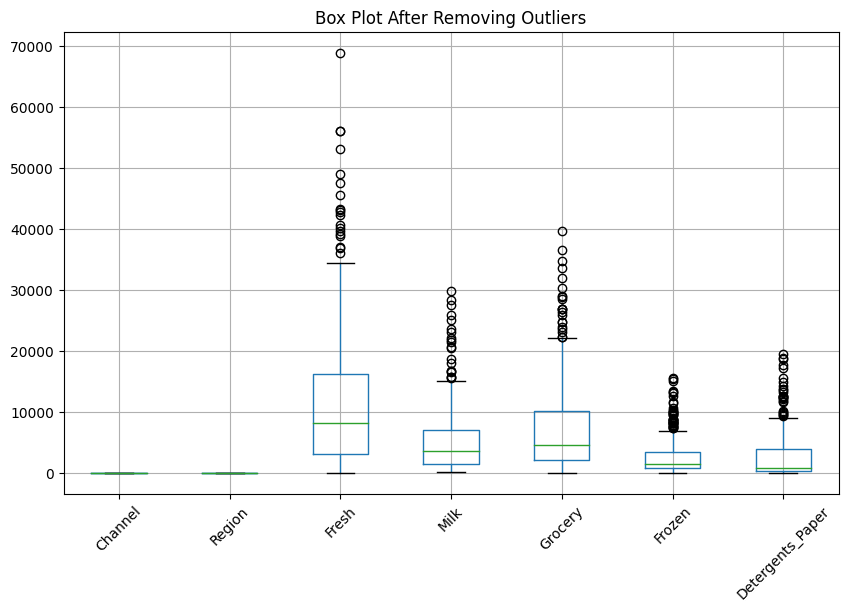

In [ ]:
#Number of row before removing outliers
row_before = df.shape[0]
#Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)  # Q1
    Q3 = df[columns].quantile(0.75)  # Q3
    IQR = Q3 - Q1  # IQR

    #Define the outlier boundaries
    lower_bound = Q1 - 3*1.5 * IQR
    upper_bound = Q3 + 3*1.5 * IQR

    #Remove outliers
    df = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

    return df

columns_to_clean = df.columns  # Select all columns for outlier removal

df= remove_outliers_iqr(df, columns_to_clean)

#Calculate number of row after removing outliers
rows_after = df.shape[0]
#Number of outliers removed
outliers_removed = row_before - rows_after
print(f'Number of outliers removed: {outliers_removed}')

#Check the box plot of dataset after removing outliers
plt.figure(figsize=(10, 6))
df[columns_to_clean].boxplot()
plt.title('Box Plot After Removing Outliers')
plt.xticks(rotation=45)
plt.show()

Only 16 outliers were removed from the dataset, which contains 440 entries. I believe this is an acceptable number
given the size of the dataset.

**One-hot encode for categorical data**

Using binary one-hot encoding for ‘Channel’ columns is essential because the
numeric labels (1 and 2) represent categorical, not ordinal or continuous data.
This enables K-Means to focus on true similarities in purchase behaviour rather
than being affected by category variables throughout the grouping process.

In [ ]:
# One-hot encode the 'Channel' column, creating new columns prefixed with 'Channel'
df = pd.get_dummies(df, columns=['Channel'], prefix=['Channel'])

df = df.astype(int)  # Converts all columns to integers, adjust as necessary

# Display the updated DataFrame
print(df.head())

   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Channel_1  \
0       3  12669  9656     7561     214              2674          0   
1       3   7057  9810     9568    1762              3293          0   
2       3   6353  8808     7684    2405              3516          0   
3       3  13265  1196     4221    6404               507          1   
4       3  22615  5410     7198    3915              1777          0   

   Channel_2  
0          1  
1          1  
2          1  
3          0  
4          1  


As a result, we successfully converted the ‘Channel’ column into ‘Channel_1’
and ‘Channel_2’, ensuring one-hot encoding.

# **2. Feature Scaling and Normalization**

In this project, I will apply clustering techniques such as K-means and hierarchical clustering. These techniques
frequently need Feature Scaling to guarantee that all features are treated similarly when measuring distance. Without
scaling, items with wider numerical ranges could influence distance calculations, resulting in biased clusters and
sometimes inaccurate groups.

**Separate target and feature variables**

In [ ]:
#features
features = df.drop(['Region'], axis=1) # 1 for column, 0 for row
labels = df[['Region']]
features.shape

(424, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Initialize step using  StandardScaler
scaler = StandardScaler()

#fit and transform on dataset
scaler.fit(features)
scaled_features = scaler.transform(features)

In [ ]:
labels.value_counts()

,count
Region,
3,303
1,76
2,45


In [ ]:
print(features)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Channel_1  Channel_2
0    12669   9656     7561     214              2674          0          1
1     7057   9810     9568    1762              3293          0          1
2     6353   8808     7684    2405              3516          0          1
3    13265   1196     4221    6404               507          1          0
4    22615   5410     7198    3915              1777          0          1
..     ...    ...      ...     ...               ...        ...        ...
435  29703  12051    16027   13135               182          1          0
436  39228   1431      764    4510                93          1          0
437  14531  15488    30243     437             14841          0          1
438  10290   1981     2232    1038               168          1          0
439   2787   1698     2510      65               477          1          0

[424 rows x 7 columns]


In [ ]:
# Print the name of the 1st and 3th features
feature_names = df.columns  # Get the original feature names from the DataFrame
print(f"1st Feature Name: {feature_names[1]}")
print(f"3th Feature Name: {feature_names[3]}")

1st Feature Name: Fresh
3th Feature Name: Grocery


# **PART II. K-MEAN AND HIERARCHICAL CLUSTERING MODEL**

# **1. K-mean Clustering**

# **1.1. Find Optimal Number of Clusters for K-mean Clustering.**

# **Elbow Method**

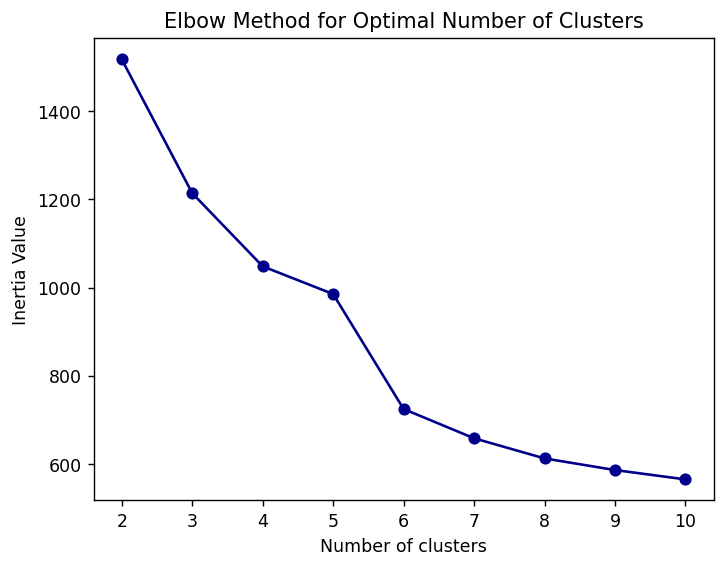

In [ ]:
from sklearn.cluster import KMeans
# Define K values range to test
K_values = range(2, 11) #Avoiding 1 cluster, max 10 clusters for 440 samples

# Initialize an empty list
inertia_value = []
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state= 0)
    kmeans.fit(scaled_features)  # Using scaled data
    #Append x value to a list
    inertia_value.append(kmeans.inertia_)

# Visualization to find optimal number of clusters (Elbow method)
plt.figure(dpi=125)
plt.plot(K_values, inertia_value , marker='o', color='darkblue')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Value')
plt.show()

The Elbow Method did not clearly show the optimal number of clusters as the plot lacked a distinct 'elbow' or sharp drop. Therefore, I will use the silhouette score – second option to identify the optimal cluster count.

# **Silhouette Score Method**

Number of clusters = 2, Silhouette Score = 0.5075969182034004
Number of clusters = 3, Silhouette Score = 0.43249606713562694
Number of clusters = 4, Silhouette Score = 0.42566683377376713
Number of clusters = 5, Silhouette Score = 0.35419366830032745
Number of clusters = 6, Silhouette Score = 0.36674786349235045
Number of clusters = 7, Silhouette Score = 0.32094766763102855
Number of clusters = 8, Silhouette Score = 0.3182219711233123
Number of clusters = 9, Silhouette Score = 0.31866644804015853
Number of clusters = 10, Silhouette Score = 0.31056549618784707


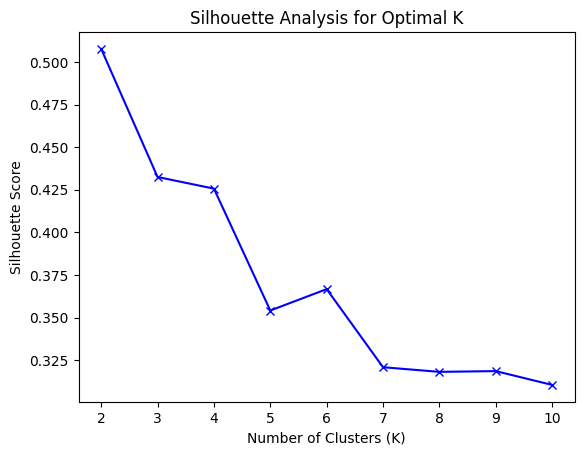

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of cluster values
range_n_clusters = range(2, 11)
silhouette_avg = []

# Loop over the range of cluster numbers
for num_clusters in range_n_clusters:
    # Initialize KMeans and fit the data
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_features)

    # Calculate the silhouette score and append to the list
    score = silhouette_score(scaled_features, cluster_labels)
    silhouette_avg.append(score)
    print(f"Number of clusters = {num_clusters}, Silhouette Score = {score}")

# Plot silhouette scores for each K
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

The silhouette score for the K-Means algorithm is highest when k = 2, indicating that the optimal number of clusters is 2. Therefore, we will use 2 clusters for the analysis.

# **1.2. Perform K-means Clustering.**

**Initialize and Train Algorithm on Scaled Data**

In [ ]:
from sklearn.cluster import KMeans
#Initialize the algorithm
kmeans_estimator = KMeans(n_clusters=2, random_state=0) #Using optimal number of clusters
#Train the algorithm & fit the model on scaled data
k_clusters = kmeans_estimator.fit(scaled_features)

**Cluster Labels, Centers, and Inertia Summary**

In [ ]:
#Labels for each data points
print("Cluster labels for each data point:" ,k_clusters.labels_)
print("Cluster labels shape:",k_clusters.labels_.shape)

#Cluster Centers
print("Cluster centers:\n", k_clusters.cluster_centers_)
print("Cluster centers shape:\n", k_clusters.cluster_centers_.shape)

#Sum of quared distance
print(k_clusters.inertia_)

Cluster labels for each data point: [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
Cluster labels shape: (424,)
Cluster centers:
 [[-0.28085452  0.83509363  1.03460482 -0.36976624  1.068

**K-Means Clustering Visualization**

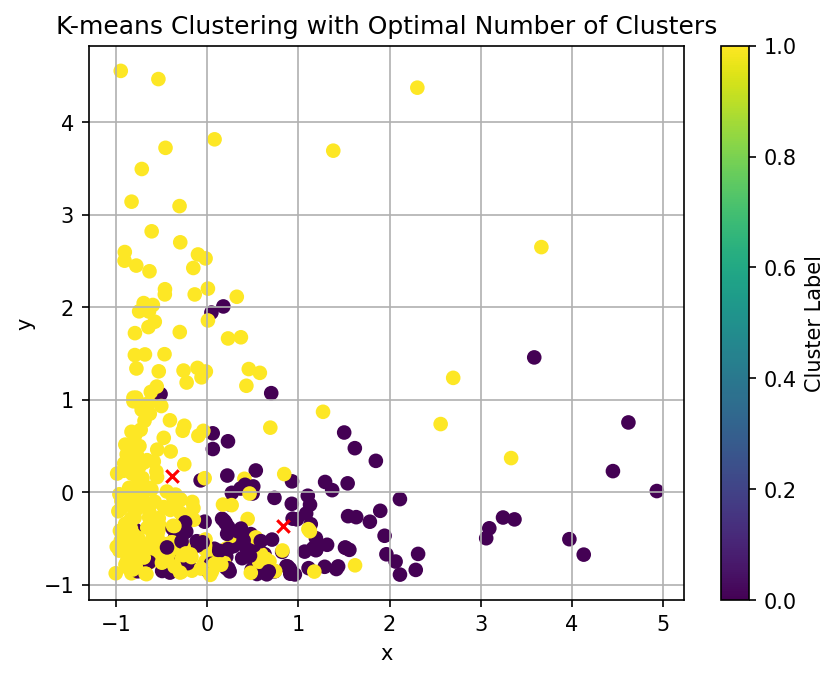

In [ ]:
#Visualization
pointlabels = k_clusters.labels_
clusterCenters = k_clusters.cluster_centers_

#Plotting data point
plt.figure(dpi=150)
plt.scatter(x=scaled_features[:, 1], y=scaled_features[:,3], c=pointlabels, cmap='viridis')
#Plot cluster centers
plt.scatter(x = clusterCenters[:,1],
            y = clusterCenters[:,3],
            marker = 'x',
            c = 'r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering with Optimal Number of Clusters')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In this chart, the x-axis displays scaled Fresh values, and the y-axis represents scaled Grocery values. Based on these
features, the points are divided into two groups, with each color representing a distinct cluster. The red hue is used to
indicate the centroids of these clusters, which display the average Fresh and Grocery values inside each.
The graphic demonstrates that scaling guarantees that both characteristics are handled equally during clustering,
resulting in a clear split of the data into two different clusters.

# **2. Hierarchical Clustering**

# **2.1. Find Optimal Number of Clusters for Hierarchical Clustering**

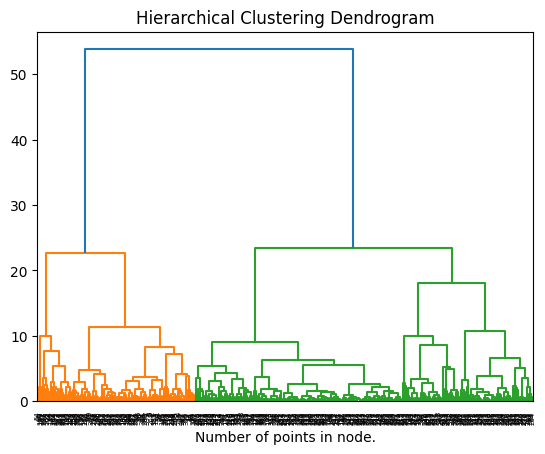

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(scaled_features)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level")
plt.xlabel("Number of points in node.")
plt.show()

From this dendrogram, the optimal number of clusters is two.

# **2.2. Perform Hierarchical Clustering.**

**Label Transformation for Hierarchical Clustering Analysis**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Function to transform labels to numeric values
def transformLabels(y):
    if y == 1:
        return 2
    elif y == 2:
        return 1
    else:  # For y == 3
        return 0

# Apply the transformLabels function to the 'Region' column of the DataFrame
labels = df['Region'].apply(transformLabels)

# Display the transformed labels
labels

label_counts = labels.value_counts()
print(label_counts)

Region
0    303
2     76
1     45
Name: count, dtype: int64


**Initialize Algorithm and Label Prediction**

In [ ]:
#Initialize the algorithm
hier_cluster = AgglomerativeClustering(n_clusters=2,  linkage='average')
#train algorithm
hier_cluster.fit(scaled_features)

AgglomerativeClustering(linkage='average')

In [ ]:
from sklearn.metrics import accuracy_score
predictedLabels = hier_cluster.labels_
print('Accuracy Score: ', accuracy_score(labels,predictedLabels))

Accuracy Score:  0.7099056603773585


**Cluster Prediction and Centroid Calculation Using NearestCentroid**

In [ ]:
#Predict
print(predictedLabels)

# Use NearestCentroid to compute centroids based on predictedLabels
from sklearn.neighbors import NearestCentroid
centroid_model = NearestCentroid()
centroid_model.fit(scaled_features, predictedLabels)

# Get the centroids
centroids = centroid_model.centroids_
print(centroids)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 2.91123333e-03 -4.18644493e-02 -3.49013674e-02 -5.82125789e-03
  -4.28780536e-02  1.39345433e-02 -1.39345433e-02]
 [-3.05679500e-01  4.3

**Hierarchical Clustering Visualization**

<Figure size 960x720 with 0 Axes>

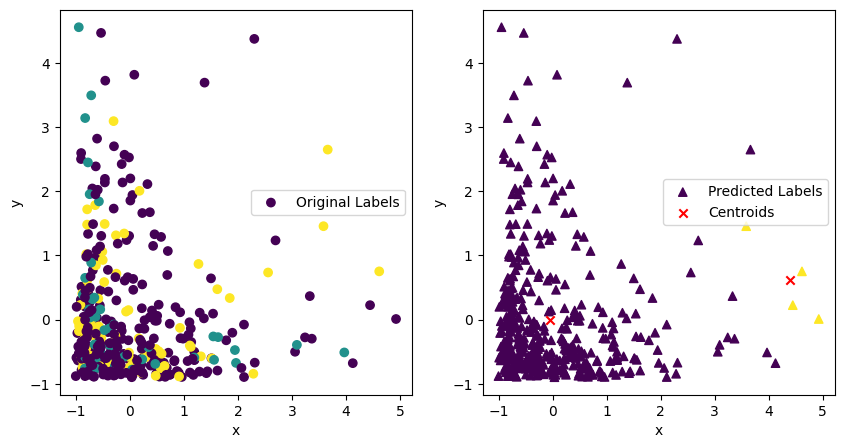

In [ ]:
#Plot the actual label
plt.figure(dpi=150)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) #1 row 2 columns
ax1.scatter(x=scaled_features[:, 1],
            y=scaled_features[:, 3],
            c=labels,
            marker ='o',
            label='Original Labels')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

#Plot the predicted label
ax2.scatter(x=scaled_features[:, 1],
            y=scaled_features[:, 3],
            c=predictedLabels,
            marker ='^',
            label='Predicted Labels')
ax2.scatter(x=centroids[:, 1],
            y=centroids[:, 3],
            marker='x',
            c='r',
            label='Centroids')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.show()

Hierarchical clustering separated the data into distinct groups based on the Fresh and Grocery attributes, but there is a
noticeable disparity between the original labels and the predicted clusters. Most data points fall into the purple group,
while only a few are in the yellow group, indicating that the clustering may be biased towards one large group.
This imbalance suggests that the model might not be capturing smaller, more distinct segments effectively, and further
refinement of the clustering approach or inclusion of additional features may be necessary to achieve better separation.

# **PART III. COMPARE AND ANALYZE THE CLUSTERING RESULTS**

# **Evaluate Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score

#K-means Clustering
score_KMeans = silhouette_score(scaled_features, kmeans_estimator.fit_predict(scaled_features))
print(f'Silhouette Score of K-Means Clustering: {score_KMeans:.4f}')

#Hierarchical Clustering
silhouette_hier = silhouette_score(scaled_features, hier_cluster.fit_predict(scaled_features))
print(f'Silhouette Score of Hierarchical Clustering: {silhouette_hier:.4f}')

Silhouette Score of K-Means Clustering: 0.5076
Silhouette Score of Hierarchical Clustering: 0.5639


Both scores show relatively high
clustering performance because they are more than 0.5,
suggesting reasonably well-separated clusters.
However, because Hierarchical Clustering (0.5639) has a higher
score, it produces better-defined and more distinct clusters than
K-Means (0.5076).

I believe this score aligns with the 2 visualizations we created earlier. In K-Means clustering, there is significant overlap
between the clusters, which accounts for the slightly lower score. Hierarchical Clustering, however, shows more distinct
separation between clusters, reflected in its higher Silhouette Score. That said, the clusters appear imbalanced, with
one being significantly larger than the other. This could be due to the method's tendency to create uneven clusters,
especially when there are outliers or customers with very distinct purchasing behaviours.

In this scenario, the best approach would be to start with K-Means for quick segmentation, followed by Hierarchical
Clustering for more detailed insights. This allows us to explore how the clusters interact at different levels, leading to a
better understanding of the data.

# **PART IV. DISCUSSION**

# **Support Vector Machines**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

#Support Vector Machine
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
# Function to reverse the transformation of labels
def reverseTransformLabels(y):
    if y == 2:
        return 1
    elif y == 1:
        return 2
    else:  # For y == 0
        return 3

# Apply the reverseTransformLabels function to revert the 'Region' labels back to the original values
labels = labels.apply(reverseTransformLabels)

# Display the reversed labels
print(labels)

# Count occurrences of each label (after reversing the transformation)
label_counts = labels.value_counts()
print(label_counts)

0      3
1      3
2      3
3      3
4      3
      ..
435    3
436    3
437    3
438    3
439    3
Name: Region, Length: 424, dtype: int64
Region
3    303
1     76
2     45
Name: count, dtype: int64


Split Data to Training and Testing

In [ ]:
# Split the dataset into training and testing sets (use all 7 features for training)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.3, random_state=0)

In [ ]:
from sklearn import svm
#Initialise the algorithm
svm_model = SVC(kernel='rbf', C=10, gamma=0.1)
#Train the model using the training sets
svm_model.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [ ]:
# Visualizing only 2 features (columns 1 & 3), set the others to their mean values.
means = X_train.mean(axis=0)
# Create a mesh grid for two features (columns 1 and 3) for visualization
x_min = X_train[:, 1].min() - 0.2
x_max = X_train[:, 1].max() + 0.2
y_min = X_train[:, 3].min() - 0.2
y_max = X_train[:, 3].max() + 0.2

In [ ]:
#Create equally-distributed grid points for x- and y-axis
area_x_range_vals = np.arange(x_min, x_max, 0.01)
area_y_range_vals = np.arange(y_min, y_max, 0.01)
print('area_x_range_vals: ', area_x_range_vals.shape)
print('area_y_range_vals: ', area_y_range_vals.shape)

area_x_range_vals:  (602,)
area_y_range_vals:  (585,)


In [ ]:
#Comebine these 2 sizes to one for visualization
xx, yy = np.meshgrid(area_x_range_vals, area_y_range_vals)
print('area_pts_x: ', xx.shape)
print('area_pts_y: ', yy.shape)

area_pts_x:  (585, 602)
area_pts_y:  (585, 602)


In [ ]:
#Combine grid points
area_pts = np.c_[xx.ravel(), yy.ravel()]  #Convert to one dimension
print('area_pts: ', area_pts.shape)
area_pts

area_pts:  (352170, 2)


array([[-1.19184209, -1.09546709],
       [-1.18184209, -1.09546709],
       [-1.17184209, -1.09546709],
       ...,
       [ 4.79815791,  4.74453291],
       [ 4.80815791,  4.74453291],
       [ 4.81815791,  4.74453291]])

In [ ]:
#Model predictions on the new data of grid points
area_pts_full = np.tile(means, (xx.ravel().shape[0], 1))

# Set column 1 (Fresh) to the mesh grid's x values
area_pts_full[:, 1] = xx.ravel()

# Set column 3 (Grocery) to the mesh grid's y values
area_pts_full[:, 3] = yy.ravel()

In [ ]:
#Predict using the full feature set
area_pts_class = svm_model.predict(area_pts_full)
#Reshape to 2-dimenstion for output prediction
area_pts_class = area_pts_class.reshape(xx.shape)
print(area_pts_class.shape)

(585, 602)


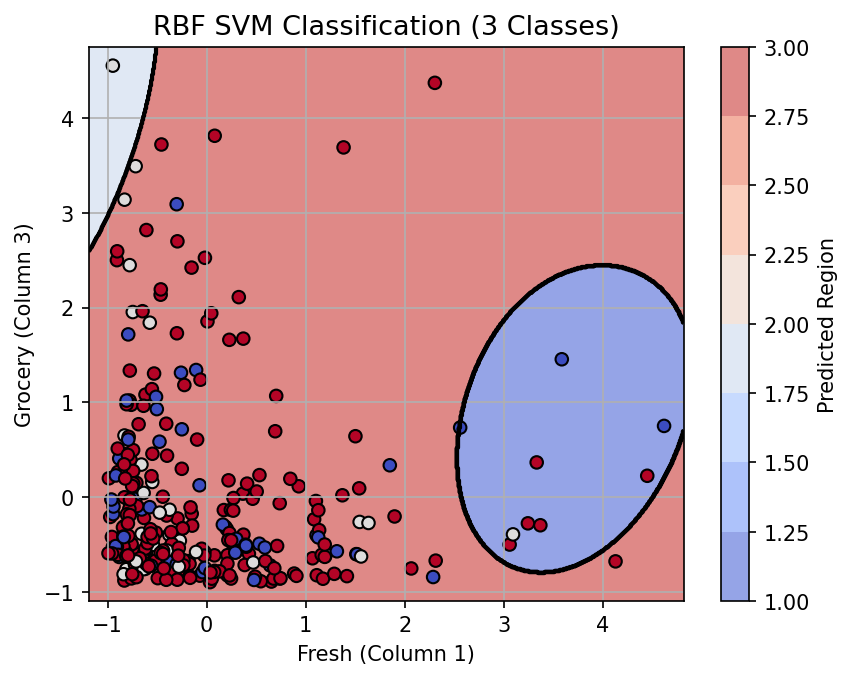

In [ ]:
# Visualization
fig, ax = plt.subplots(dpi=150)

# Plot the decision regions using contourf
contourf = ax.contourf(xx, yy, area_pts_class, cmap='coolwarm', alpha=0.6)

# Add the decision boundaries
contour = ax.contour(xx, yy, area_pts_class, levels=np.unique(area_pts_class), colors='black', linewidths=2)

# Scatter plot of the training data points
scatter = ax.scatter(x=X_train[:, 1], y=X_train[:, 3], c=y_train, cmap='coolwarm', edgecolors='k')

# Set x and y limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# x and y-axis labels
ax.set_xlabel('Fresh (Column 1)')
ax.set_ylabel('Grocery (Column 3)')

# Title of the plot
ax.set_title(f'RBF SVM Classification (3 Classes)', fontsize=13)

# Add color bar for predicted regions
plt.colorbar(contourf, ax=ax, label='Predicted Region')

# Show grid and plot
ax.grid(True)
plt.show()

The SVM model divides consumers into 3 categories based on their spending on Fresh and Grocery items. However,
there is some overlap in the lower-left region, where customers have similar purchasing patterns, making it challenging
to classify them accurately. In the upper-right, there is a distinct group of high-spending customers who could be
potential targets for premium marketing. A few outliers in the upper-left reflect unique purchasing habits.
The difference in cluster sizes indicates that most customers follow similar spending patterns, while smaller groups
show more diverse behaviours.

# **Compare Supervised Method and Unsupervised Method**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#K-Means Clustering
# Predicted cluster labels for each data point
kmeans_predictions = kmeans_estimator.labels_
# K-Means classification report (using cluster labels as predicted and region labels as true labels)
print(f'K-Means Classification Report:\n {classification_report(labels, kmeans_predictions, zero_division=1)}\n ')
#Confusion matrix for K-Means clustering
confusion_matrix_kmeans = confusion_matrix(labels, kmeans_predictions)
print(f'Confusion Matrix for K-Means Clustering:\n {confusion_matrix_kmeans}\n\n ')

#SVM
#Predict the response for test set
predictions = svm_model.predict(X_test)
# SVM classification report
print(f"SVM Classification Report:\n {classification_report(y_test, predictions, zero_division=1)}\n ")
print(f'Confusion Matrix for SVM: \n  {confusion_matrix(y_test, predictions)}')

K-Means Classification Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.20      0.76      0.32        76
           2       1.00      0.00      0.00        45
           3       1.00      0.00      0.00       303

    accuracy                           0.14       424
   macro avg       0.55      0.44      0.08       424
weighted avg       0.86      0.14      0.06       424

 
Confusion Matrix for K-Means Clustering:
 [[  0   0   0   0]
 [ 18  58   0   0]
 [ 17  28   0   0]
 [ 99 204   0   0]]

 
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           2       1.00      0.00      0.00        14
           3       0.69      0.99      0.81        89

    accuracy                           0.69       128
   macro avg       0.56      0.33      0.27       128
weighted avg       0.59      0.69      0.57       128



The metrics comparison reveals that:

• K-Means has significant problems in predicting labelled classes such as Region because it was not built for such
tasks. It succeeds in identifying natural patterns or clusters in data, but it falls short when dealing with particular labels.

• SVM, on the other hand, has significant advantages in classification accuracy since it learns from labelled data and provides well-defined decision boundaries. However, its success is dependent on having enough labelled
data for training.


In conclusion, K-Means is beneficial for exploratory clustering, but SVM succeeds in producing correct predictions when
class labels are known, demonstrating the advantages of supervised learning in this case.